In [1]:
import numpy as np
import os
import cv2
import torch
import imageio

In [2]:
# Load data
dist_path = '/root/dataset/shan/panorama_motion/archiviz_rot_only/dists'
dists = []

for i in range(100):
    dist =  np.load(os.path.join(dist_path, str(i)+'.npy'), allow_pickle=True)
    dists.append(dist)

In [8]:
dists = np.array(dists)
print(dists.shape)

(100, 800, 800)


AxisError: axis 3 is out of bounds for array of dimension 3

In [ ]:
freq_bands = 2.**np.linspace(0., 9, num=10)
print(freq_bands)

In [ ]:
scaled_dist_0 = (dist_0 / np.max(dist_0))
print(scaled_dist_0)

scaled_freq_bands = freq_bands / np.max(freq_bands)
scaled_freq_bands = np.insert(scaled_freq_bands, 0, 0)
print(scaled_freq_bands)

In [ ]:
ranges = []
clip_values = []
idx = 0

while True:
    ranges.append((scaled_freq_bands[idx], scaled_freq_bands[idx+1]))
    clip_values.append(idx+1)
    idx += 1
    
    if idx == 9:
        break

print(ranges)
print(clip_values)

In [ ]:
# clip scaled_dist_map
clip_dist_map = np.zeros_like(scaled_dist_0)

for i, (lower, upper) in enumerate(ranges):
    clip_dist_map[(scaled_dist_0>=lower) & (scaled_dist_0 < upper)] = clip_values[i]


In [ ]:
print(np.sum(scaled_dist_0 == 0))

In [ ]:
dists = np.array(dists) / 255.
print(dists)

In [ ]:
import numpy as np
freq_bands = 2.**np.linspace(0., 9, num=10)
scaled_freq_bands = freq_bands / np.max(freq_bands)
scaled_freq_bands = np.insert(scaled_freq_bands, 0, 0)

print(scaled_freq_bands)

In [ ]:
ranges = []
clip_values = []
idx = 0

while True:
    ranges.append((scaled_freq_bands[idx], scaled_freq_bands[idx+1]))
    clip_values.append(idx+1)
    idx += 1
    
    if idx == len(scaled_freq_bands)-1:
        break

In [ ]:
ranges

In [ ]:
# clip scaled_dist_map
clip_dist_map = np.zeros_like(dists)

for i, (lower, upper) in enumerate(ranges):
    clip_dist_map[(dists>=lower) & (dists < upper)] = clip_values[i]

In [ ]:
dist_thresholds = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

for i in range(21):
    print(dist_thresholds[i // 2])

In [ ]:
list(range(1, 10+1))[::-1]

In [9]:
import torch

freq_bands = 2.**torch.linspace(0., 9, steps=10)
periodic_fns = [torch.sin, torch.cos]
embed_fns = []
out_dim = 0
d=3

for freq in freq_bands:
    for p_fn in periodic_fns:
        embed_fns.append(lambda x, p_fn=p_fn, freq=freq : p_fn(x * freq))
        out_dim += d

In [15]:
embed_fns[10]

<function __main__.<lambda>(x, p_fn=<built-in method sin of type object at 0x7fb3315bfec0>, freq=tensor(32.))>

In [17]:
sin_embed_fns = [func for func in embed_fns if func.__defaults__[1] == torch.sin]

[]


In [82]:
for fn in embed_fns:
    print(fn.__defaults__[0] == torch.sin)

True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False
True
False


[[1.8053368 1.8054731 1.8055197 ... 1.3000773 1.2991229 1.2981415]
 [1.8085761 1.8087137 1.8088092 ... 1.3000753 1.2997917 1.2994249]
 [1.811779  1.8119158 1.8120255 ... 1.3028184 1.3026185 1.3021829]
 ...
 [1.1062062 1.1061622 1.1061727 ... 1.1492431 1.1477662 1.1462317]
 [1.1037188 1.1036654 1.103605  ... 1.1483681 1.1400898 1.1387539]
 [1.1012548 1.1012363 1.1012337 ... 1.1399633 1.1379339 1.1359885]]


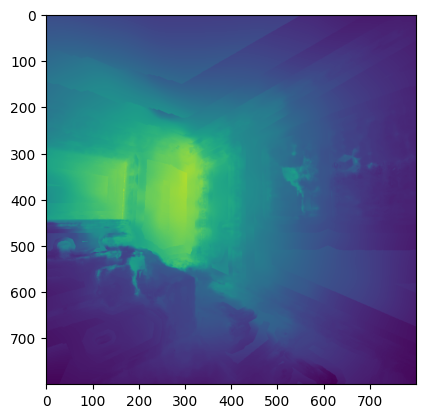

In [112]:
import numpy as np
import matplotlib.pyplot as plt

pred_depth = np.load('/root/dev/baseline/nerf/logs/distance_aware_pe_v2/testset_050000/depth_002.npy', allow_pickle=True)
print(pred_depth)

plt.imshow(pred_depth)
plt.show()

[[1.3872502 1.3872511 1.387251  ... 1.3872505 1.3872509 1.3872513]
 [1.3904397 1.3904394 1.3904392 ... 1.3904388 1.3904389 1.3904395]
 [1.3936422 1.393642  1.3936418 ... 1.393642  1.3936423 1.3936422]
 ...
 [1.0350685 1.0362256 1.0374002 ... 1.2378144 1.2378142 1.2378144]
 [1.0349817 1.0361419 1.0373166 ... 1.2343934 1.2343938 1.2343929]
 [1.0348957 1.0360582 1.0372331 ... 1.2309916 1.2309909 1.2309914]]


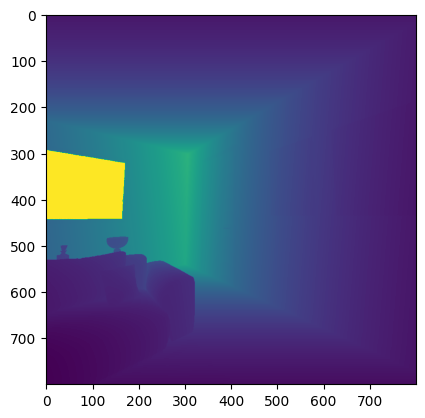

In [113]:
depth = np.load('/root/dataset/shan/panorama_motion/archiviz_extrap/depths/2.npy', allow_pickle=True)
depth[depth > 6.5] = 6.5
print(depth)

plt.imshow(depth)
plt.show()

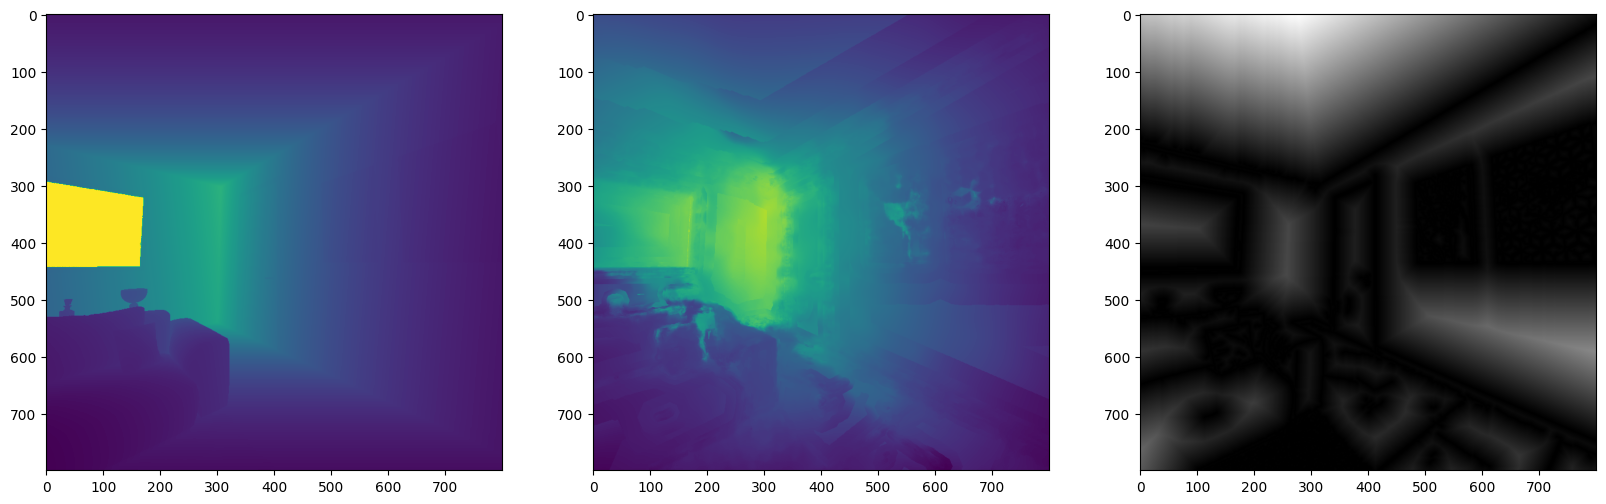

In [116]:
gt_dist = cv2.imread('/root/dataset/shan/panorama_motion/archiviz_extrap/dists/2.png')

_, pos = plt.subplots(nrows=1, ncols=3, figsize=(20,40))
pos[0].imshow(depth)
pos[1].imshow(pred_depth)
pos[2].imshow(gt_dist)
plt.show()

/tmp/ipykernel_451016/3866098990.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  dists = imageio.imread('/root/dataset/shan/panorama_motion/archiviz_extrap/dists/2.png')


[0.         0.00195312 0.00390625 0.0078125  0.015625   0.03125
 0.0625     0.125      0.25       0.5        1.        ]
[(0.0, 0.001953125), (0.001953125, 0.00390625), (0.00390625, 0.0078125), (0.0078125, 0.015625), (0.015625, 0.03125), (0.03125, 0.0625), (0.0625, 0.125), (0.125, 0.25), (0.25, 0.5), (0.5, 1.0)]
0.0 0.001953125
0.001953125 0.00390625
0.00390625 0.0078125
0.0078125 0.015625
0.015625 0.03125
0.03125 0.0625
0.0625 0.125
0.125 0.25
0.25 0.5
0.5 1.0


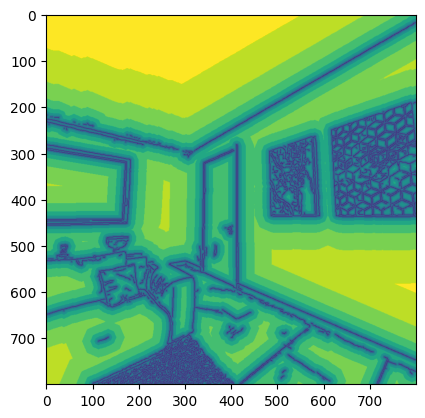

In [145]:
import numpy as np
import imageio

dists = imageio.imread('/root/dataset/shan/panorama_motion/archiviz_extrap/dists/2.png')
dists = np.array(dists) / 255

# freq bands
freq_bands = 2.**np.linspace(0., 9, num=10)
scaled_freq_bands = freq_bands / np.max(freq_bands)
scaled_freq_bands = np.insert(scaled_freq_bands, 0, 0)
print(scaled_freq_bands)

# distance clipping
ranges = []
clip_values = []
idx = 0

while True:
    ranges.append((scaled_freq_bands[idx], scaled_freq_bands[idx+1]))
    clip_values.append(idx+1)
    idx += 1
    
    if idx == len(scaled_freq_bands) - 1:
        break

print(ranges)
# clip scaled_dist_map
clip_dist_map = np.zeros_like(dists)

for i, (lower, upper) in enumerate(ranges):
    print(lower, upper)
    mask = (dists>=lower) & (dists < upper)
    clip_dist_map[(dists>=lower) & (dists < upper)] = clip_values[i]

plt.imshow(clip_dist_map)
plt.show()

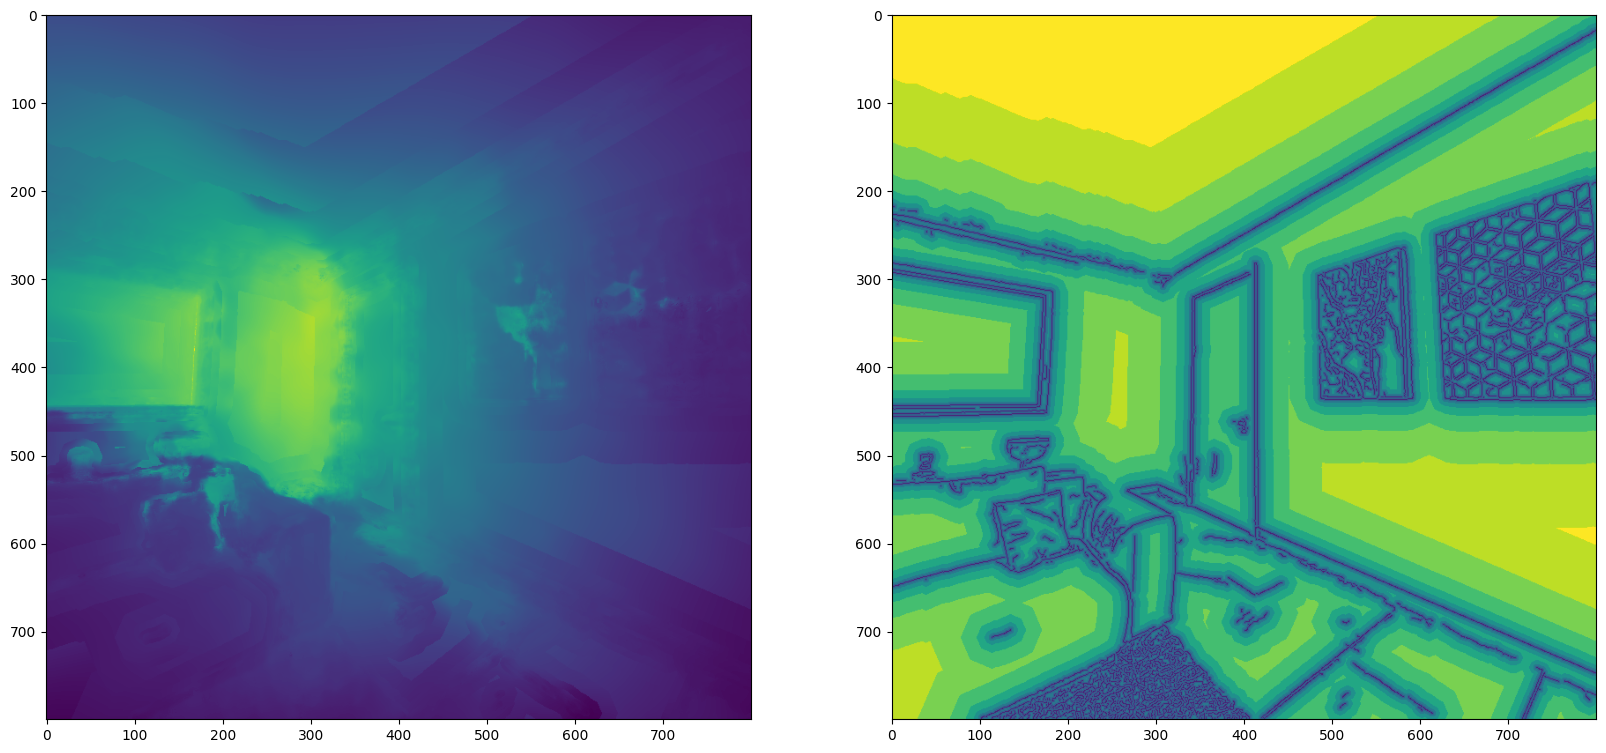

In [153]:
_, pos = plt.subplots(nrows=1, ncols=2, figsize=(20,40))
pos[0].imshow(pred_depth)
pos[1].imshow(clip_dist_map)
plt.show()